In [2]:
import matplotlib.pyplot as plt
import numpy             as np
import pickle

In [7]:
data_filename = 'c:/Users/byecs/MaxwellHardSphere_data.pkl'
data_file     = open(data_filename,'rb')
speeds    = pickle.load(data_file)

In [12]:
def MB_dist(vs):
    T       = 300            #Kelvin (K)
    k_b     = 1.4e-23        #J/K
    N_A     = 6.0221408e+23
    He_mm   = 4e-3           #kilograms/mole
    He_mass = He_mm/N_A      #kilograms
    
    coeff = np.power((He_mass/2.0/np.pi/k_b/T),1.5)*4*np.pi*vs**2
    body  = np.exp(-He_mass*vs**2/2.0/k_b/T)
    
    return coeff*body

vs = np.arange(0,3000,10)
mb = MB_dist(vs)

Text(0, 0.5, 'Probability of Occurance')

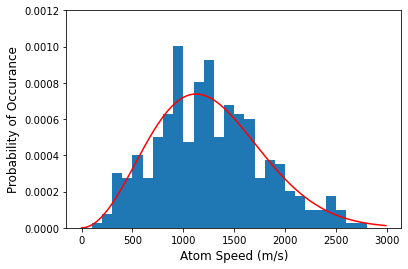

In [25]:
plt.hist(speeds[200],bins=np.arange(0,3000,100),density=True);
plt.plot(vs,mb,'r-')
plt.ylim([0,0.0012])
plt.xlabel('Atom Speed (m/s)',fontsize=12)
plt.ylabel('Probability of Occurance',fontsize=12)

(array([4.58605143e-05, 2.75163086e-04, 8.25489258e-04, 2.20130469e-03,
        3.80642269e-03, 4.76949349e-03, 3.43953858e-03, 2.06372315e-03,
        6.87907715e-04, 2.29302572e-04]),
 array([ 972.97100006, 1027.48412614, 1081.99725222, 1136.5103783 ,
        1191.02350438, 1245.53663046, 1300.04975654, 1354.56288262,
        1409.0760087 , 1463.58913477, 1518.10226085]),
 <BarContainer object of 10 artists>)

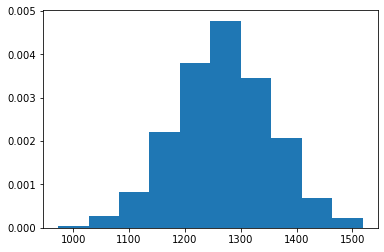

In [127]:
#not the result I thought because what I am actually doing in this cell is to invoke the central limit theorem
#thus I get a gaussian distribution centered on the average MB speed
plt.hist(np.average(speeds[:,:],axis=0),density=True)

In [47]:
aves  = np.average(speeds,axis=1)
maxes = np.max(speeds,axis=1) 
mins  = np.min(speeds,axis=1)
ergs  = np.sum(np.array([speeds[i,:]**2 for i in range(2001)]),axis=1)

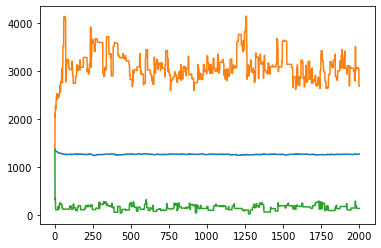

In [42]:
plt.plot(aves, label='averages')
plt.plot(maxes,label='maximums')
plt.plot(mins, label='minimums')

(7.585, 7.59)

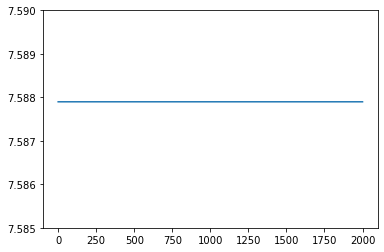

In [53]:
plt.plot(ergs/1e8)
plt.ylim([7.585,7.590])

In [64]:
bins = np.arange(0,3000,100)
width = 0.9 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

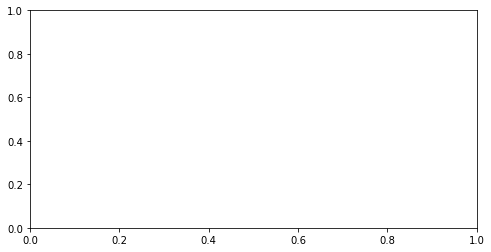

In [159]:
fig = plt.figure(figsize=(8,4))
ax  = fig.add_subplot(1,1,1)
for i in range(len(speeds)):
    hists = np.zeros(len(bins)-1)
    for speed in speeds[0:i+1]:
        curr_hist = np.histogram(speed,bins,density=True)
        hists     = hists + curr_hist[0] 
    hists = hists/(i+1)
    ax.bar(center, hists, align='center', width=width)
    ax.plot(vs,mb,'r-')
    ax.set_ylim([0,0.0010])
    ax.set_xlabel('Atom Speed (m/s)',fontsize=12)
    ax.set_ylabel('Probability of Occurance',fontsize=12)
    frame_number = f'{i:05}'+'.png'
    fig.savefig('c:/Users/byecs/Downloads/temp/'+frame_number,dpi=300)
    ax.cla()

In [144]:
for i in range(10):
    print(f'{i:05}')

00000
00001
00002
00003
00004
00005
00006
00007
00008
00009


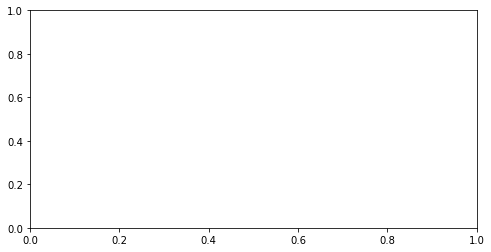

In [163]:
fig = plt.figure(figsize=(8,4))
ax  = fig.add_subplot(1,1,1)
for i in range(len(speeds)):
    ax.hist(speeds[i],bins=bins,density=True)
    ax.plot(vs,mb,'r-')
    ax.set_ylim([0,0.0010])
    ax.set_xlabel('Atom Speed (m/s)',fontsize=12)
    ax.set_ylabel('Probability of Occurance',fontsize=12)
    frame_number = f'{i:05}'+'.png'
    fig.savefig('c:/Users/byecs/Downloads/temp/'+frame_number,dpi=300)
    ax.cla()